# Normal way

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:\\ML-DataSets\\concrete_data.csv")

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
x = df.drop(columns=['Strength'])
y = df['Strength']   

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6275531792314848

# Let's check the distribution of data a pdf plot and a QQ plot

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

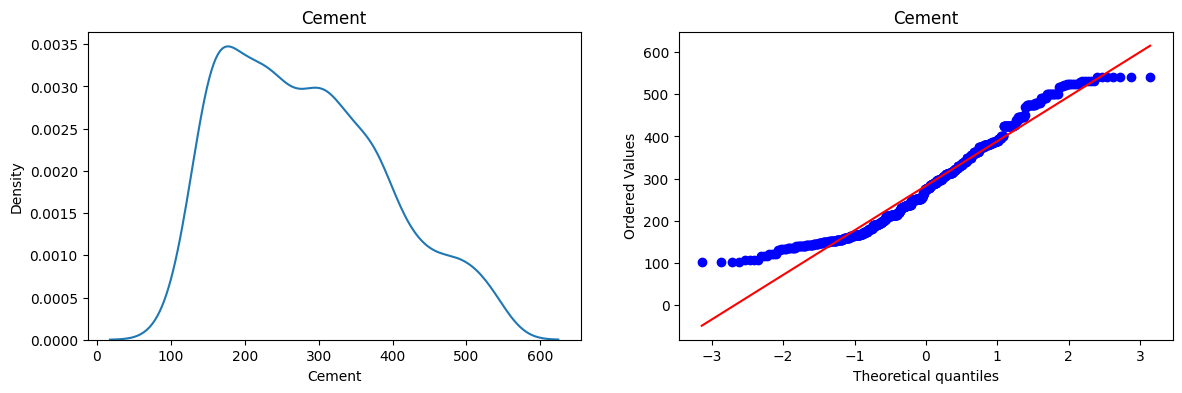

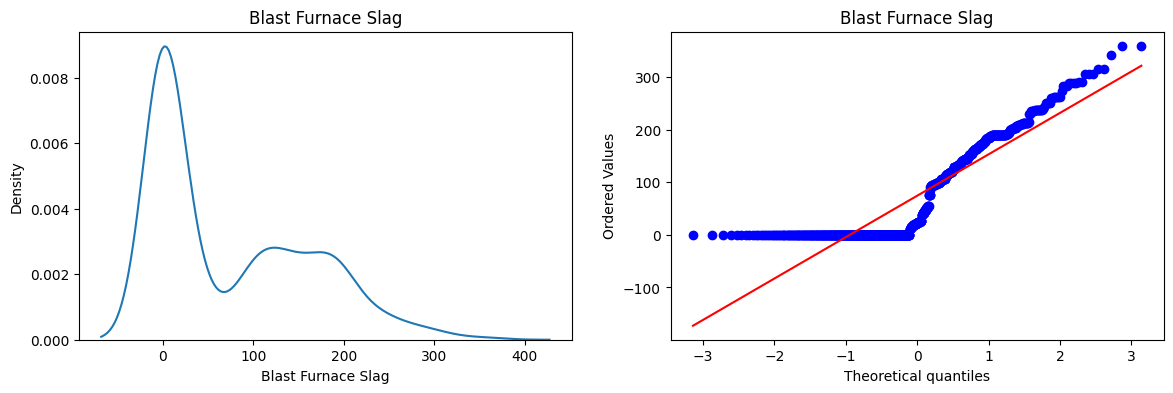

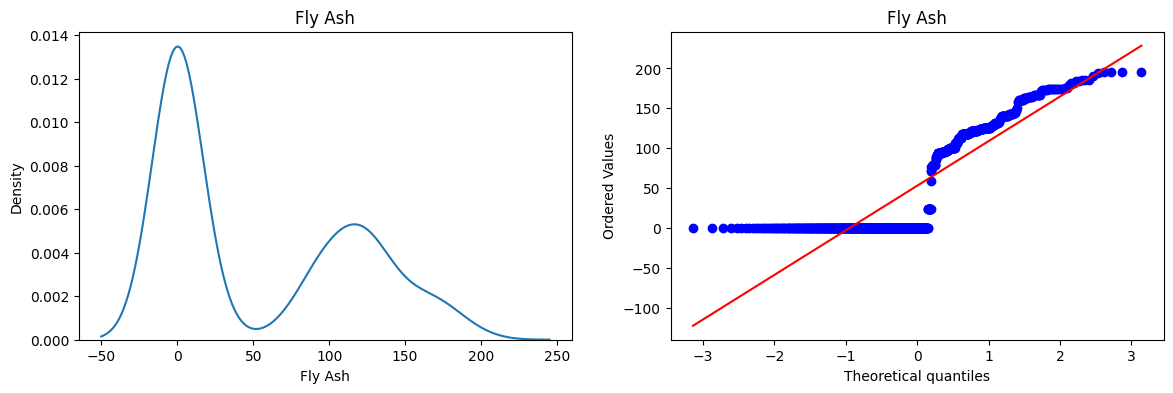

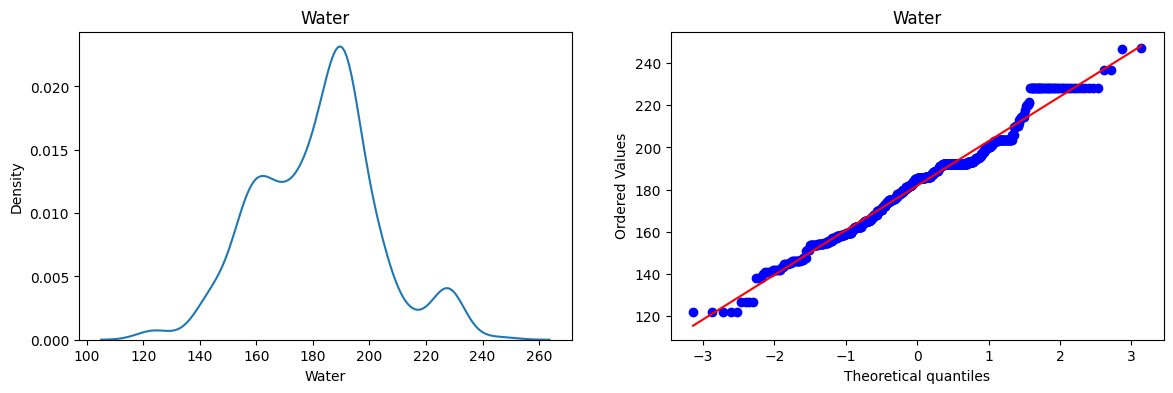

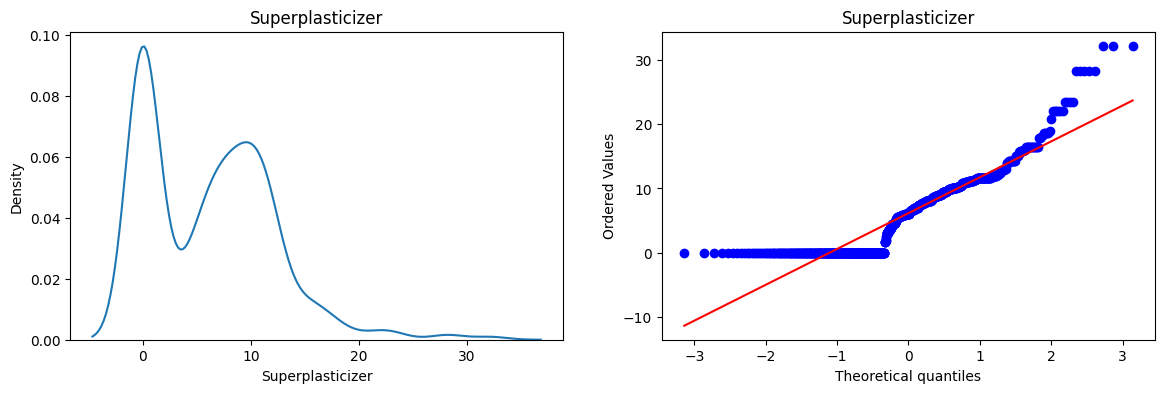

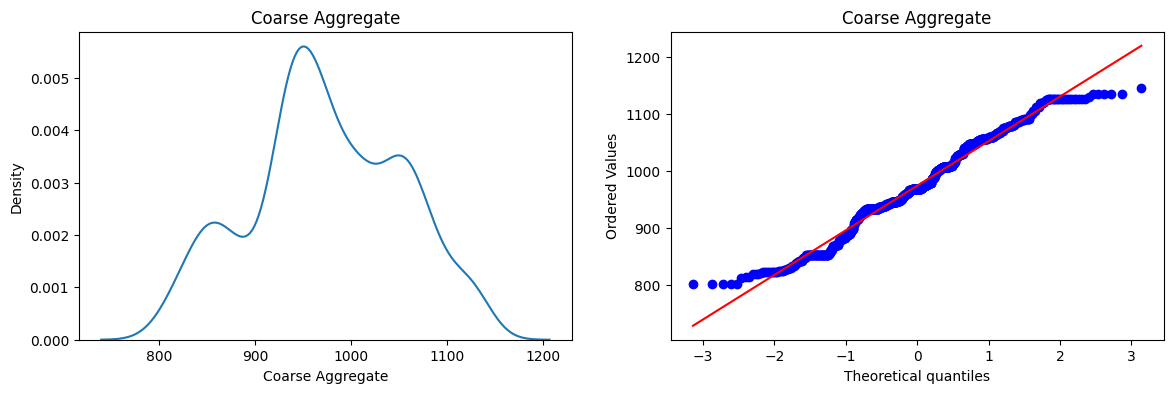

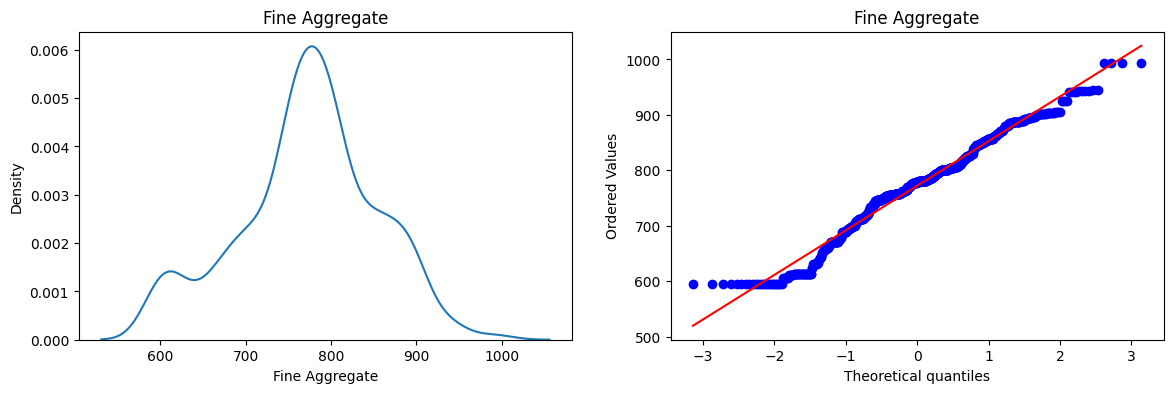

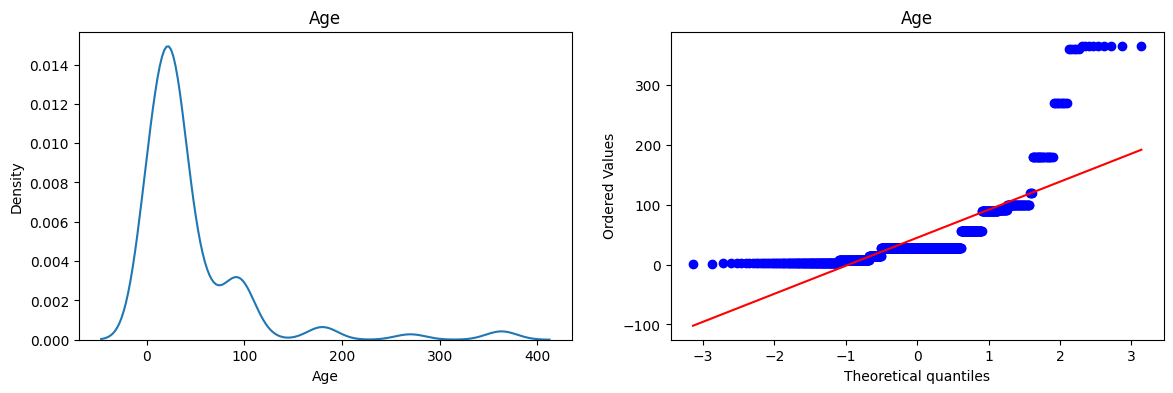

In [16]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col], dist='norm', plot=plt)
    plt.title(col)

    plt.show()


In [17]:
from sklearn.preprocessing import PowerTransformer

trf = PowerTransformer(method='box-cox')
x_train_transformed = trf.fit_transform(x_train + 0.0000000000000001)
x_test_transformed = trf.transform(x_test + 0.0000000000001)

In [20]:
lr.fit(x_train_transformed, y_train)
y_pred = lr.predict(x_test_transformed)

r2_score(y_test, y_pred)

0.8068296535352271